In [37]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import sys

from alpha_vantage.timeseries import TimeSeries

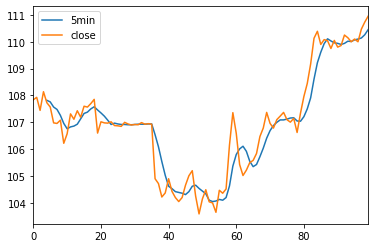

In [38]:
ts = TimeSeries(key='Keys')
data, meta_data = ts.get_intraday('AAPL')
df = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])
for d, p in data.items():
    date = datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S')
    data_row=[date, float(p['1. open']), float(p['2. high']), float(p['3. low']), float(p['4. close']), int(p['5. volume'])]
    df.loc[-1,:]=data_row
    df.index=df.index+1
data=df.sort_values('date')
data['close']=data['close'].astype(float)
data['5min']=np.round(data['close'].rolling(window=5).mean(),2)
data[['5min', 'close']].plot()
plt.show()


In [39]:
print(data)

                   date     open     high      low     close    volume    5min
0   2020-09-18 11:15:00   108.18   108.43   107.55  107.8400  10749776     NaN
1   2020-09-18 11:30:00   107.84   108.29   107.76  107.9306   6058382     NaN
2   2020-09-18 11:45:00   107.93   107.94    107.2  107.4454   8382586     NaN
3   2020-09-18 12:00:00   107.45   108.35   107.42  108.1400   6281652     NaN
4   2020-09-18 12:15:00   108.14    109.7   107.65  107.7300   5887680  107.82
5   2020-09-18 12:30:00   107.72   107.77   107.25  107.5700   7111507  107.76
6   2020-09-18 12:45:00   107.56   107.65   106.72  106.9800   9509371  107.57
7   2020-09-18 13:00:00  106.961   107.16   106.52  106.9587   7156945  107.48
8   2020-09-18 13:15:00   106.96   107.15   106.55  107.0800   6297159  107.26
9   2020-09-18 13:30:00  107.075  107.075    106.2  106.2200   6273055  106.96
10  2020-09-18 13:45:00   106.22   106.69   106.09  106.5750   7235668  106.76
11  2020-09-18 14:00:00   106.57   107.39   106.37  